In [ ]:
#importing the necessary libraries
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
path_folder='D:/Ekush/male'

src = path_folder+"/110" #111,112,113,114,115,116,117,118,119
dir_folders = os.listdir(src)
for dir_name in dir_folders:
    a='zero'+dir_name #zero,one,two,three,four,five,six,seven,eight,nine
    os.rename(src+ "/" +dir_name, src+ "/" +a)

In [ ]:
#Male digit images folder 110-119 coppied to allmale folder

path_folder='D:/Ekush/male'

for i in range(0,10,1):
    src = path_folder+"/11"+str(i)
    path = 'D:/Ekush/allmale'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, path)

In [ ]:

path_folder='D:/Ekush/female'

src = path_folder+"/110" #111,112,113,114,115,116,117,118,119
dir_folders = os.listdir(src)
for dir_name in dir_folders:
    a='zero'+dir_name #zero,one,two,three,four,five,six,seven,eight,nine
    os.rename(src+ "/" +dir_name, src+ "/" +a)


In [ ]:
#Female digit images folder 110-119 coppied to allfemale folder

path_folder='D:/Ekush/female'

for i in range(0,10,1):
    src = path_folder+"/11"+str(i)
    path = 'D:/Ekush/allfemale1'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, path)


In [ ]:
a=os.listdir('D:/Ekush/allmale')
df = pd.DataFrame(data={"digit": 0, "filename": a})
df.to_csv("D:/Ekush/allmale.csv", sep=',',index=False)

In [ ]:
a=os.listdir('D:/Ekush/allfemale')
df = pd.DataFrame(data={"digit": 1, "filename": a})
df.to_csv("D:/Ekush/allfemale.csv", sep=',',index=False)

In [ ]:
PATH = 'D:/Ekush/'
os.listdir(PATH)

['allfemale',
 'allfemale.csv',
 'allmale',
 'allmale.csv',
 'female',
 'female.zip',
 'male',
 'male.zip',
 'modelassignment2',
 'train']

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('allmale.csv')
b_csv = showRawTrainingSamples('allfemale.csv')

allmale.csv
Index(['digit', 'filename'], dtype='object')
allfemale.csv
Index(['digit', 'filename'], dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:2, :])   
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)

                          filename  digit
0          eight0_18_kis_2_361.jpg      0
1      eight0_B.BARIA_14_1_362.jpg      0
2      eight0_B.BARIA_17_2_363.jpg      0
3        eight0_B.BARIA_20_3_1.jpg      0
4      eight0_B.BARIA_20_3_364.jpg      0
...                            ...    ...
15063      zero0_THAK_20_3_345.jpg      0
15064      zero0_THAK_20_3_346.jpg      0
15065      zero0_THAK_21_3_347.jpg      0
15066      zero0_THAK_21_3_348.jpg      0
15067      zero0_THAK_22_3_349.jpg      0

[15068 rows x 2 columns]
                      filename  digit
0      eight0_18_kis_2_361.jpg      0
1  eight0_B.BARIA_14_1_362.jpg      0
                          filename  digit
0          eight1_14_BOG_1_317.jpg      1
1        eight1_22_Farid_3_318.jpg      1
2      eight1_B.BARIA_11_1_319.jpg      1
3      eight1_B.BARIA_11_1_320.jpg      1
4      eight1_B.BARIA_11_1_321.jpg      1
...                            ...    ...
15615       zero1_TAN_1_1_1577.jpg      1
15616        zero1_T

In [ ]:
#here i merge the two csv file
total_csv = [a_csv, b_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

30688


In [ ]:
TRAIN_PATH = 'D:/Ekush/train'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
        shutil.copy(file_name, TRAIN_PATH)

In [ ]:
processImages('allmale')
print('Male Done')
processImages('allfemale')
print('Female Done')

Male Done
Female Done


In [ ]:
path_folder='D:/Ekush/train'
#resizing the images
dir_folders = os.listdir(src)
for img_name in dir_folders:
    image = Image.open(path_folder+'/'+img_name)
    new_image = image.resize((28, 28))
    new_image.save(path_folder+'/'+img_name)

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  30688


#setting1
Here I Take Batch Size 100,number of hidden nodes are 150 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 2 ReLU6 activation function with hidden layer.

In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 2

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

16


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:277
Test dataloader:31


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (relu_1): ReLU6()
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (relu_2): ReLU6()
  (linear_out): Linear(in_features=150, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6725316047668457. Accuracy: 61.473272490221646
Iteration: 1000. Loss: 0.5992047190666199. Accuracy: 62.54889178617992
Iteration: 1500. Loss: 0.628337562084198. Accuracy: 61.3102998696219
Iteration: 2000. Loss: 0.5357048511505127. Accuracy: 61.79921773142112
Iteration: 2500. Loss: 0.5901457071304321. Accuracy: 62.1251629726206
Iteration: 3000. Loss: 0.565665602684021. Accuracy: 61.27770534550196
Iteration: 3500. Loss: 0.4572366774082184. Accuracy: 62.027379400260756
Iteration: 4000. Loss: 0.4148126542568207. Accuracy: 60.821382007822685


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model3.pkl') 

[0.6725316047668457, 0.5992047190666199, 0.628337562084198, 0.5357048511505127, 0.5901457071304321, 0.565665602684021, 0.4572366774082184, 0.4148126542568207]


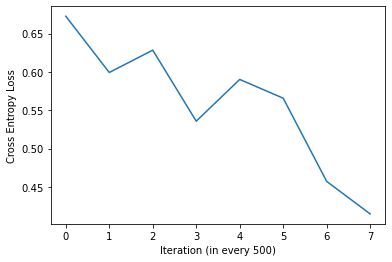

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#setting2
Here I Take Batch Size 200,number of hidden nodes are 150 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 2 RReLU activation function with hidden layer.


In [ ]:
# Hyperparameters

batch_size = 200
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 2

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

32


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:139
Test dataloader:16


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.RReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.RReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (relu_1): RReLU(lower=0.125, upper=0.3333333333333333)
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (relu_2): RReLU(lower=0.125, upper=0.3333333333333333)
  (linear_out): Linear(in_features=150, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6284856200218201. Accuracy: 60.59322033898305
Iteration: 1000. Loss: 0.6407042145729065. Accuracy: 61.994784876140805
Iteration: 1500. Loss: 0.5953037738800049. Accuracy: 62.54889178617992
Iteration: 2000. Loss: 0.5629770755767822. Accuracy: 61.92959582790091
Iteration: 2500. Loss: 0.5530240535736084. Accuracy: 60.95176010430248
Iteration: 3000. Loss: 0.461105078458786. Accuracy: 60.88657105606258
Iteration: 3500. Loss: 0.38365936279296875. Accuracy: 60.39765319426336
Iteration: 4000. Loss: 0.38014352321624756. Accuracy: 61.11473272490222


In [ ]:

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model5.pkl') 

[0.6284856200218201, 0.6407042145729065, 0.5953037738800049, 0.5629770755767822, 0.5530240535736084, 0.461105078458786, 0.38365936279296875, 0.38014352321624756]


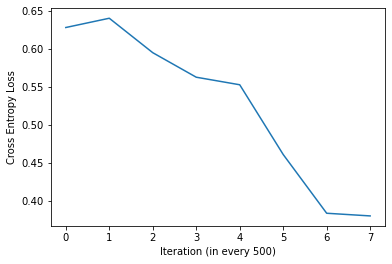

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#setting3
Here I Take Batch Size 200,number of hidden nodes are 150 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 2 Sigmoid activation function with hidden layer.


In [ ]:
# Hyperparameters

batch_size = 200
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 2

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

32


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:139
Test dataloader:16


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.sigmoid_1 = nn.Sigmoid()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.sigmoid_2 = nn.Sigmoid()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.sigmoid_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.sigmoid_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (sigmoid_1): Sigmoid()
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (sigmoid_2): Sigmoid()
  (linear_out): Linear(in_features=150, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6351383924484253. Accuracy: 61.3754889178618
Iteration: 1000. Loss: 0.5954489707946777. Accuracy: 63.363754889178615
Iteration: 1500. Loss: 0.5778551697731018. Accuracy: 62.614080834419816
Iteration: 2000. Loss: 0.5657685995101929. Accuracy: 62.09256844850065
Iteration: 2500. Loss: 0.5064361691474915. Accuracy: 60.75619295958279
Iteration: 3000. Loss: 0.3955766260623932. Accuracy: 61.96219035202086
Iteration: 3500. Loss: 0.3358219861984253. Accuracy: 61.83181225554107
Iteration: 4000. Loss: 0.22064530849456787. Accuracy: 61.408083441981745


In [ ]:

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model7.pkl') 

[0.6650289297103882, 0.5804467797279358, 0.5906534790992737, 0.4903383255004883, 0.3718002736568451, 0.20101004838943481, 0.190901979804039, 0.13234025239944458]


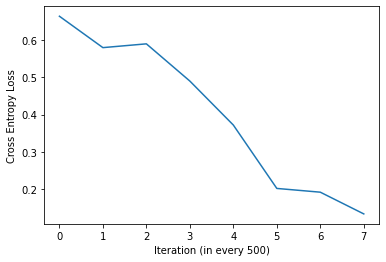

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#setting4
Here I Take Batch Size 100,number of hidden nodes are 150 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 3 CELU activation function with hidden layer.


In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 2

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

16


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:277
Test dataloader:31


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.celu_1 = nn.CELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.celu_2 = nn.CELU()
        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.celu_3 = nn.CELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.celu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.celu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden
                              )
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (celu_1): CELU(alpha=1.0)
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (celu_2): CELU(alpha=1.0)
  (linear_3): Linear(in_features=150, out_features=150, bias=True)
  (celu_3): CELU(alpha=1.0)
  (linear_out): Linear(in_features=150, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.69938063621521. Accuracy: 61.994784876140805
Iteration: 1000. Loss: 0.6752460598945618. Accuracy: 63.13559322033898
Iteration: 1500. Loss: 0.6665568351745605. Accuracy: 63.428943937418516
Iteration: 2000. Loss: 0.6104181408882141. Accuracy: 62.972620599739244
Iteration: 2500. Loss: 0.552032470703125. Accuracy: 61.83181225554107
Iteration: 3000. Loss: 0.5329058170318604. Accuracy: 62.972620599739244
Iteration: 3500. Loss: 0.5958788394927979. Accuracy: 61.83181225554107
Iteration: 4000. Loss: 0.5270498394966125. Accuracy: 61.53846153846154


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model1.pkl') 

[0.69938063621521, 0.6752460598945618, 0.6665568351745605, 0.6104181408882141, 0.552032470703125, 0.5329058170318604, 0.5958788394927979, 0.5270498394966125]


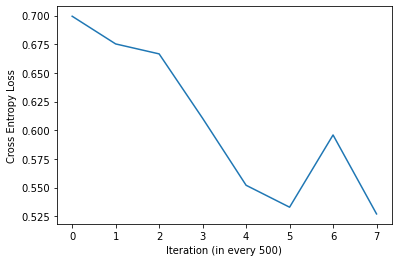

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Here I take num_iteration 5000 for all the settings and input dimention 28*28 = 784 with output dimention 2.Also I get better result using CELU,RReLU and Sigmoid activation function.

**Settings Table:-**

| Settings| Batch Size      | num_hidden nodes |  Number Of hidden Layer           |  Accuracy(%)|
|:--------:| :----------: | : -----------:|:-----:      |:-----------:|
| 1        | 100          | 150        |  2    |  60.82    |
| 2        | 200          | 150        |  2    |  61.11  |
| 3        | 200          | 150        |  2   |  61.40     |
| 4        | 100          | 150        |  3   |  61.53     |


From the table it can be seen that I got the highst accuracy for the Ekush dataset is 61.53 for the setting 4.So if the batch size is 100 and number of hidden nodes are 150 and also the increasing hidden layer then for this dataset I get better result.

Here I show the loss curves from setting 1 to 4 respectively.


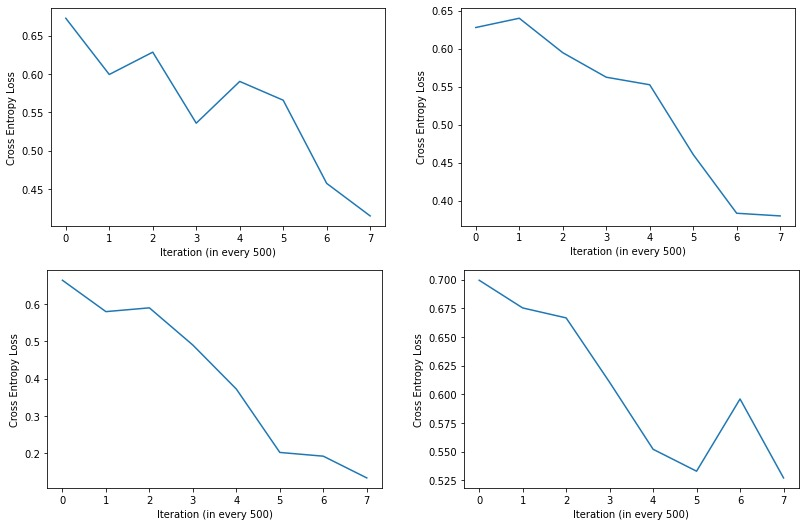